# Customers' Data Analysis and Modelling
###  Wilson adejo
###  25-05-2023


## Contents

### <a href='#1'>1. Importing Libraries and Reading the Dataset</a>
             
### <a href='#2'>2. Exploration Data Analysis</a>

### <a href='#3'>3. Data Preprocessing & Feature Engineering</a>
 
### <a href='#4'>4. Split the dataset into training and test sets</a>
    
### <a href='#5'>5.Modelling and Evaluation</a>
      


## <a id='1'>1. Importing Libraries and Reading the Dataset</a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling as pp  - - Now depreciated
import ydata_profiling as pp
import sklearn as sk
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, r2_score

%matplotlib inline



In [7]:
# Load the dataset into a pandas DataFrame
dataset = pd.read_csv('Modelling Task Data.csv')

In [8]:
dataset.sample(4)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
92           93    15809248      Cole          524      geo1  Female   36   
670         671    15576368   Bledsoe          624      geo3  Female   48   
9406       9407    15743760  Davidson          850      geo1    Male   31   
3977       3978    15813894     Bogle          620      geo2    Male   21   

     Tenure    Balance  HasClaimed  NumOfProducts  HasCrCard  IsMember  \
92       10       0.00           0              2          1         0   
670       3  122388.38           0              2          0         0   
9406      6  131996.66           0              2          1         1   
3977      9       0.00           0              2          0         0   

      Marketing12m     Salary  Exited  
92             NaN  109614.57       0  
670            NaN   30020.09       0  
9406           NaN  178747.43       0  
3977           NaN  154882.79       0

In [9]:
dataset.shape

(10000, 16)


## <a id='2'>2. Exploartory  Data Analysis</a>
Importing Libraries and Reading the Dataset
This section contain the exploratory data analysis carried out to have a general overview of the dataset. A dataset with a total of 10000 rows and 16 columns was examined and analysed. It has  6 numerics and 9 categorical columns with 2.5% missing cellsEDA is where we get the basic understanding of the data in hand which then helps us in the further process of Data Cleaning & Data Preparation.

In [10]:
print(dataset.count())  # Count the Number of Non-Missing Values for each Variable
print(dataset.shape)
dataset.describe().style.background_gradient(cmap='rainbow')      #gives the summary of all the numerical variables present in our data frame

RowNumber        10000
CustomerId       10000
Surname          10000
CreditScore      10000
Geography         9983
Gender           10000
Age              10000
Tenure           10000
Balance           9980
HasClaimed       10000
NumOfProducts    10000
HasCrCard        10000
IsMember         10000
Marketing12m      3923
Salary           10000
Exited           10000
dtype: int64
(10000, 16)


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RowNumber      10000 non-null  int64  
 1   CustomerId     10000 non-null  int64  
 2   Surname        10000 non-null  object 
 3   CreditScore    10000 non-null  int64  
 4   Geography      9983 non-null   object 
 5   Gender         10000 non-null  object 
 6   Age            10000 non-null  int64  
 7   Tenure         10000 non-null  object 
 8   Balance        9980 non-null   float64
 9   HasClaimed     10000 non-null  int64  
 10  NumOfProducts  10000 non-null  int64  
 11  HasCrCard      10000 non-null  int64  
 12  IsMember       10000 non-null  int64  
 13  Marketing12m   3923 non-null   float64
 14  Salary         10000 non-null  float64
 15  Exited         10000 non-null  int64  
dtypes: float64(3), int64(9), object(4)
memory usage: 1.2+ MB


In [12]:
# Using ProfileReport to have a quick overview of the data and save as output.html file 
profile = pp.ProfileReport(dataset) 
profile.to_file("output.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'HasClaimed', 'NumOfProducts',
       'HasCrCard', 'IsMember', 'Marketing12m', 'Salary', 'Exited'],
      dtype='object')

In [14]:
dataset.drop(['RowNumber', 'CustomerId', 'Surname','Marketing12m'], inplace=True, axis=1, errors='ignore')


In [15]:
dataset.head()

CreditScore Geography  Gender  Age Tenure    Balance  HasClaimed  \
0          619      geo1  Female   42      2       0.00           0   
1          608      geo2  Female   41      1   83807.86           0   
2          502      geo1  Female   42      8  159660.80           0   
3          699      geo1  Female   39      1       0.00           0   
4          850      geo2  Female   43      2  125510.82           0   

   NumOfProducts  HasCrCard  IsMember     Salary  Exited  
0              1          1         1  101348.88       1  
1              1          0         1  112542.58       0  
2              3          1         0  113931.57       1  
3              2          0         0   93826.63       0  
4              1          1         1   79084.10       0

In [16]:
dataset.duplicated().sum()   #  check the duplicate in the dataset


0

<AxesSubplot:xlabel='Exited', ylabel='count'>

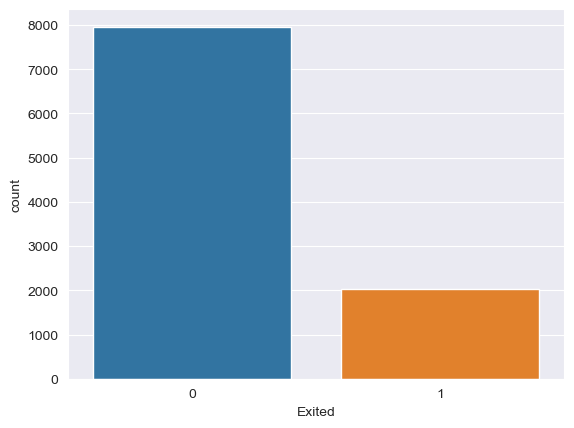

In [17]:
## Lets visualise exited parameter
sns.countplot(data=dataset, x='Exited')

<AxesSubplot:xlabel='Geography', ylabel='count'>

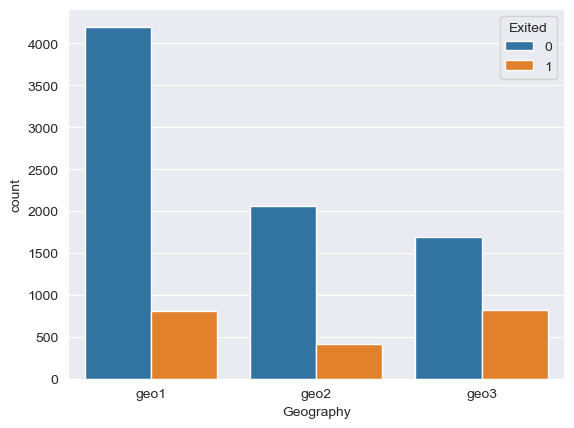

In [18]:
# Check the Geography against exited
sns.countplot(data=dataset, x='Geography',hue ='Exited')

<AxesSubplot:xlabel='Gender', ylabel='count'>

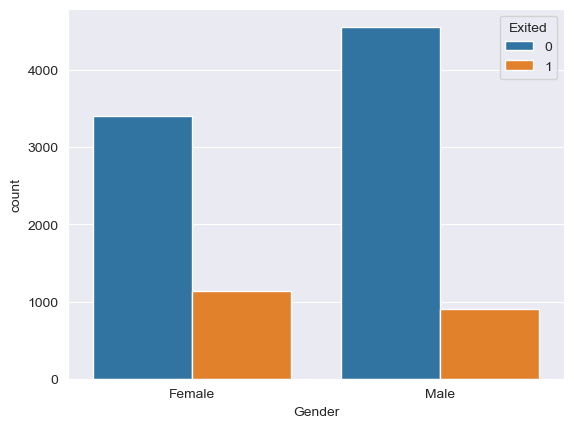

In [19]:
# Check the Gendery against exited
sns.countplot(data=dataset, x='Gender',hue ='Exited')

<AxesSubplot:title={'center':'Age'}, xlabel='Exited'>

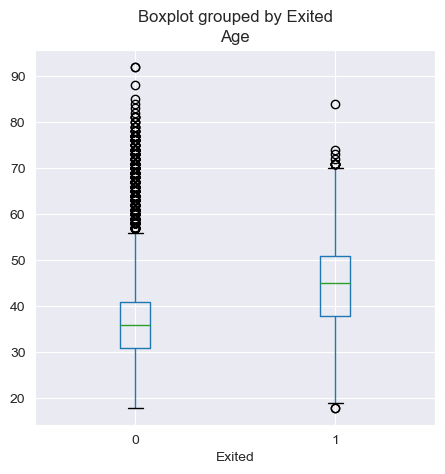

In [20]:
# Check the age against exited
dataset.boxplot(column= 'Age', by ='Exited', figsize=(5,5))

<AxesSubplot:xlabel='Exited', ylabel='Age'>

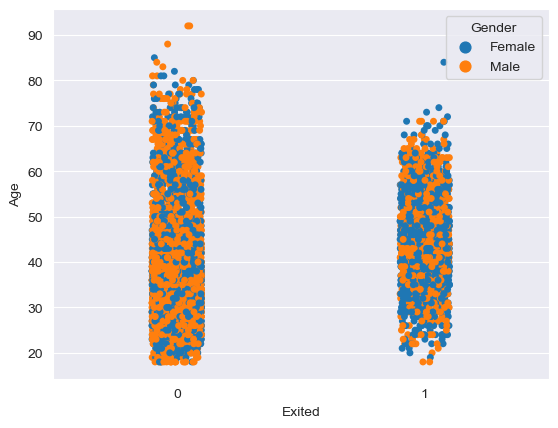

In [21]:
# Check the Geography against exited
sns.stripplot(data=dataset, y='Age', x ='Exited', hue='Gender')

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

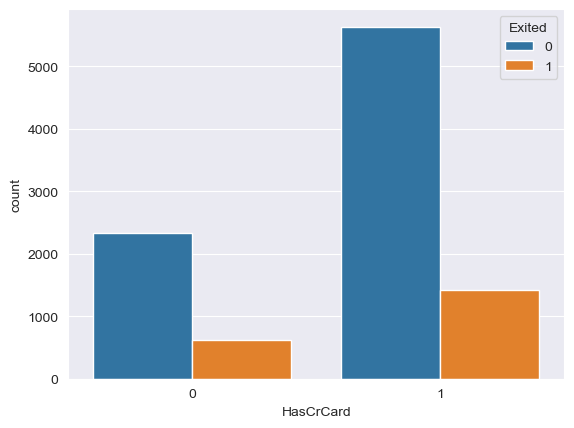

In [22]:
# Check the Geography against exited
sns.countplot(data=dataset, x='HasCrCard',hue ='Exited')

<AxesSubplot:xlabel='IsMember', ylabel='count'>

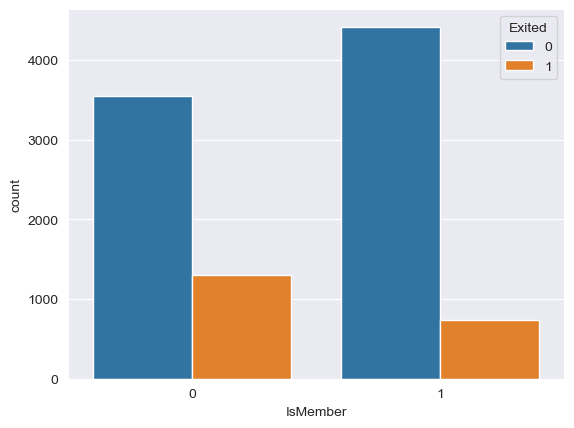

In [23]:
# Check the Geography against exited
sns.countplot(data=dataset, x='IsMember',hue ='Exited')

In [24]:
dataset['Tenure'].dtype

dtype('O')

In [25]:
dataset['Tenure'].replace('New', float('nan'), inplace=True)

# Convert the column to integer or numeric
dataset['Tenure'] = pd.to_numeric(dataset['Tenure'])
#dataset['Tenure']  = dataset['Tenure'] .astype(int)

In [26]:
# Checkin class imbalance in the Exited column: 
#To solve this I will use oversampling of the minority class and evualuate using confusion metric
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64


## <a id='3'>3. Data Preprocessing,Feature Engineering and Visualization</a>

Ensure that the dataset is properly preprocessed, with missing values handled, datatype corrected and categorical variables encoded if necessary.

In [27]:
dataset.isnull().sum()   #Detecting the Missing Values

CreditScore       0
Geography        17
Gender            0
Age               0
Tenure            3
Balance          20
HasClaimed        0
NumOfProducts     0
HasCrCard         0
IsMember          0
Salary            0
Exited            0
dtype: int64

#### Filling missing values  with thier respective bvalues

In [28]:
from scipy.stats import mode
dataset['Geography'].fillna(method='ffill', inplace=True)

##Impute Mean in Balance columns
mean_balance = dataset['Balance'].mean()
dataset['Balance'].fillna(mean_balance, inplace=True)

mean_tenure = np.mean(dataset['Tenure'])
dataset['Tenure'].fillna(mean_tenure, inplace=True)

In [29]:
dataset.isnull().sum() 

CreditScore      0
Geography        0
Gender           0
Age              0
Tenure           0
Balance          0
HasClaimed       0
NumOfProducts    0
HasCrCard        0
IsMember         0
Salary           0
Exited           0
dtype: int64

In [30]:
print(dataset['Gender'].unique())
print(dataset['Geography'].unique())

['Female' 'Male']
['geo1' 'geo2' 'geo3']


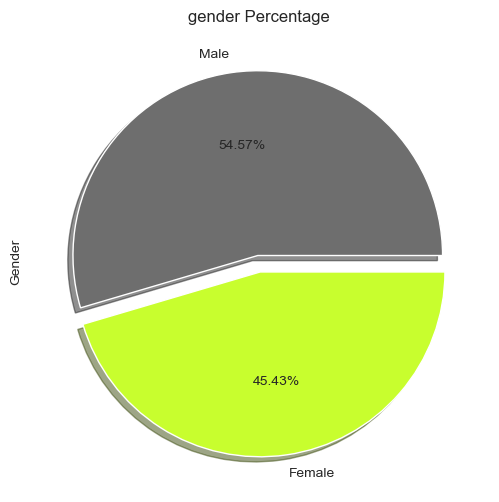

In [31]:
dataset['Gender'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',figsize=(8,6),title="gender Percentage", explode=[0.03,0.06],
     labels=['Male', 'Female'],
     colors=['#6E6E6E', '#C8FE2E'],
     autopct='%1.2f%%',
     shadow=True)
plt.show()

In [32]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

label_encoder = preprocessing.LabelEncoder()

In [33]:
#one_hot_encoded_data = pd.get_dummies(dataset, columns = ['Geography', 'Gender'])
#print(one_hot_encoded_data)


dataset['Geography']= label_encoder.fit_transform(dataset['Geography'])
dataset['Gender']= label_encoder.fit_transform(dataset[ 'Gender'])

In [34]:
dataset.sample(10)

CreditScore  Geography  Gender  Age  Tenure    Balance  HasClaimed  \
2953          650          0       0   43     6.0       0.00           1   
793           743          2       0   34     1.0  131736.88           0   
3564          847          0       1   51     5.0   97565.74           0   
291           747          1       0   41     5.0   94521.17           0   
7921          588          1       0   35     7.0       0.00           0   
22            510          1       0   38     4.0       0.00           0   
688           625          0       0   51     7.0  136294.97           0   
7047          785          1       0   31     2.0  121691.54           0   
5635          568          1       0   27     1.0  116320.68           1   
3568          714          1       1   20     3.0       0.00           0   

      NumOfProducts  HasCrCard  IsMember     Salary  Exited  
2953              2          1         1   16301.91       0  
793               1          1         1  108543.21       0  
3564              1          0         0  144184.06       1  
291               2          1         0  194926.86       0  
7921              2          1         1  108739.15       0  
22                1          1         0  118913.53       1  
688               1          1         0   38867.46       1  
7047              2          0         0   81778.72       0  
5635              1          0         1   45563.94       0  
3568              2          0         1  150465.93       0

<AxesSubplot:>

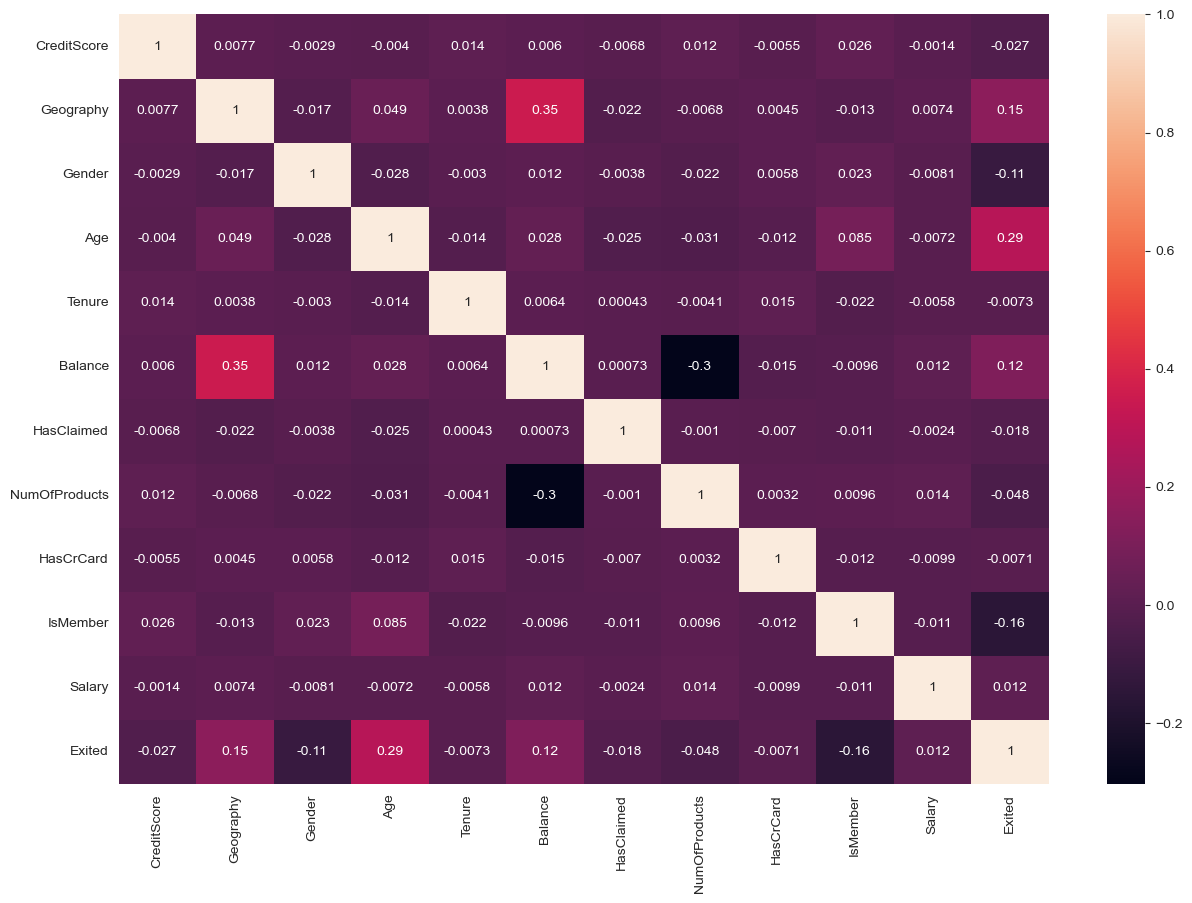

In [35]:
corr = dataset.corr()
#Plot figsize
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [36]:
# Check the  correlation between the variables and   Exited
# sorting the correlation in descending order
corr['Exited'].sort_values(ascending=False)

Exited           1.000000
Age              0.285323
Geography        0.154680
Balance          0.118323
Salary           0.012097
HasCrCard       -0.007138
Tenure          -0.007271
HasClaimed      -0.018207
CreditScore     -0.027094
NumOfProducts   -0.047820
Gender          -0.106512
IsMember        -0.156128
Name: Exited, dtype: float64

In [37]:
print(dataset.columns)   # checking the column names


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'HasClaimed', 'NumOfProducts', 'HasCrCard', 'IsMember', 'Salary',
       'Exited'],
      dtype='object')


In [38]:
print(dataset.head(2))
print(dataset.shape)

   CreditScore  Geography  Gender  Age  Tenure   Balance  HasClaimed  \
0          619          0       0   42     2.0      0.00           0   
1          608          1       0   41     1.0  83807.86           0   

   NumOfProducts  HasCrCard  IsMember     Salary  Exited  
0              1          1         1  101348.88       1  
1              1          0         1  112542.58       0  
(10000, 12)


## <a id='4'>4. Split the dataset into training and test sets</a>
#### 4a.Split the data into features (X) and target variable (y)

In [39]:
# Split the data into features (X) and target variable (y)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [40]:
X.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  HasClaimed  \
0          619          0       0   42     2.0       0.00           0   
1          608          1       0   41     1.0   83807.86           0   
2          502          0       0   42     8.0  159660.80           0   
3          699          0       0   39     1.0       0.00           0   
4          850          1       0   43     2.0  125510.82           0   

   NumOfProducts  HasCrCard  IsMember     Salary  
0              1          1         1  101348.88  
1              1          0         1  112542.58  
2              3          1         0  113931.57  
3              2          0         0   93826.63  
4              1          1         1   79084.10

In [41]:
print(X.shape)
print(y.shape)


(10000, 11)
(10000,)


In [42]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CreditScore    10000 non-null  int64  
 1   Geography      10000 non-null  int32  
 2   Gender         10000 non-null  int32  
 3   Age            10000 non-null  int64  
 4   Tenure         10000 non-null  float64
 5   Balance        10000 non-null  float64
 6   HasClaimed     10000 non-null  int64  
 7   NumOfProducts  10000 non-null  int64  
 8   HasCrCard      10000 non-null  int64  
 9   IsMember       10000 non-null  int64  
 10  Salary         10000 non-null  float64
dtypes: float64(3), int32(2), int64(6)
memory usage: 781.4 KB


#### 4b. Splitting the dataset into the Training set and Test set

In [43]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



### 4b. Determine the Feature Importance

In [44]:
# Create a random forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Perform permutation importance
result = permutation_importance(rf_classifier, X_test, y_test, n_repeats=10, random_state=42)

# Get the feature importance scores
importance_scores = result.importances_mean


# Print the feature importance scores
for feature, score in zip(X, importance_scores):
    print(f"{feature}: {score}")

CreditScore: 0.0013000000000000234
Geography: 0.01385000000000004
Gender: 0.003900000000000026
Age: 0.07375000000000002
Tenure: 0.0049500000000000325
Balance: 0.011400000000000021
HasClaimed: -0.00019999999999996686
NumOfProducts: 0.05975000000000004
HasCrCard: 0.0010500000000000288
IsMember: 0.02970000000000005
Salary: 0.0033000000000000364


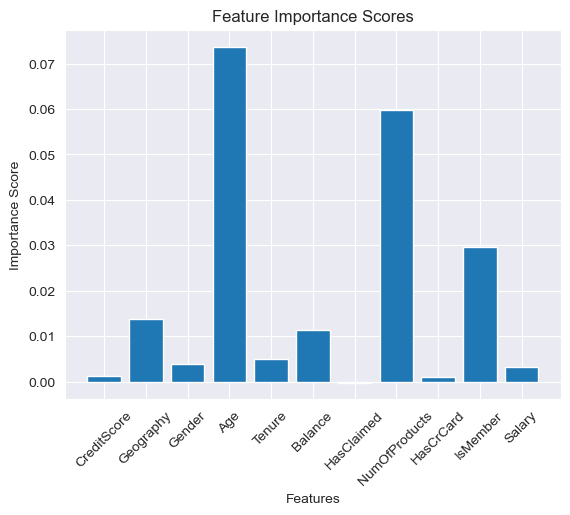

In [45]:
# Convert feature names and scores to lists
feature_names = list(X)
importance_scores = list(importance_scores)

# Plot the feature importance scores in a bar chart
plt.bar(feature_names, importance_scores)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.xticks(rotation=45)
plt.show()


## <a id='5'>5. Classification  Models  & Evaluation</a>

####  *Define/ create the model/Classifier
####  *Fit /Train the model
#### *Predict the model
#### *Evaluate the model

### Logistic  Regression Classifier

In [46]:

# Create a logistic regression classifier
classifier_lr = LogisticRegression()

# Train the classifier
classifier_lr.fit(X_train, y_train)

# Make predictions on the test set
predictions_lr = classifier_lr.predict(X_test)

Accuracy: 79.35%
Confusion Matrix:
[[1565   28]
 [ 385   22]]


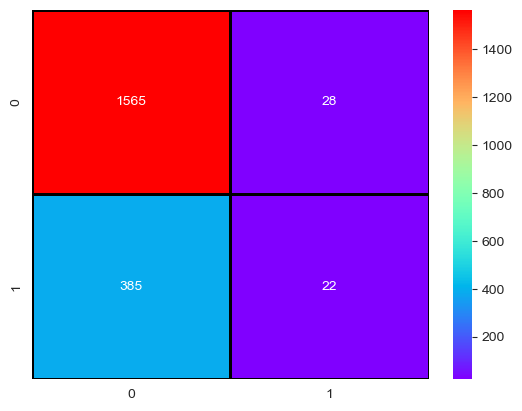

In [47]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_lr)
formatted_accuracy = "{:.2%}".format(accuracy)
print('Accuracy:', formatted_accuracy)

# Calculate confusion matrix
cm_LR = confusion_matrix(y_test, predictions_lr)
sns.heatmap(cm_LR, annot=True,cmap='rainbow',linewidth=1,linecolor='black',fmt='.0f')
print('Confusion Matrix:')
print(cm_LR)

In [48]:
# Calculate precision, recall, and F1 score
report_lr = classification_report(y_test, predictions_lr)
print('Classification Report is:')
print(report_lr)

Classification Report is:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1593
           1       0.44      0.05      0.10       407

    accuracy                           0.79      2000
   macro avg       0.62      0.52      0.49      2000
weighted avg       0.73      0.79      0.72      2000



### Random Forest Classifier

In [49]:
# Create a Random Forest classifier
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
classifier_rf.fit(X_train, y_train)

# Make predictions on the test set
predictions_rf = classifier_rf.predict(X_test)

Accuracy: 86.55%
Confusion Matrix:
[[1542   51]
 [ 218  189]]


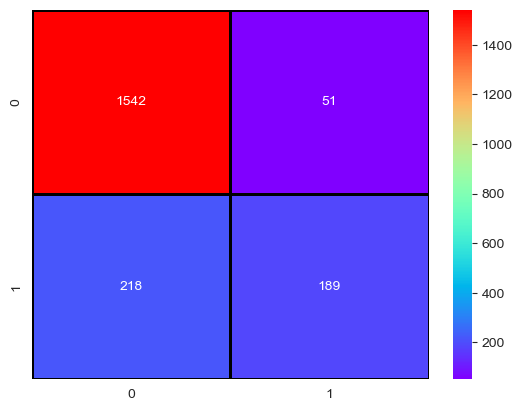

In [50]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
formatted_accuracy_rf = "{:.2%}".format(accuracy_rf)
print('Accuracy:', formatted_accuracy_rf)

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, predictions_rf)
sns.heatmap(cm_rf, annot=True,cmap='rainbow',linewidth=1,linecolor='black',fmt='.0f')
print('Confusion Matrix:')
print(cm_rf)

In [51]:
# Calculate precision, recall, and F1 score
report_rf = classification_report(y_test, predictions_rf)
print('Classification Report is:')
print(report_rf)

Classification Report is:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.46      0.58       407

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



###  SVM Classifier

In [52]:
# Create/define an SVM classifier
classifier_svm = SVC()

# Train the classifier
classifier_svm.fit(X_train, y_train)

# Make predictions on the test set
svm_predictions = classifier_svm.predict(X_test)


Accuracy  is: 79.65%
Confusion Matrix:
[[1593    0]
 [ 407    0]]


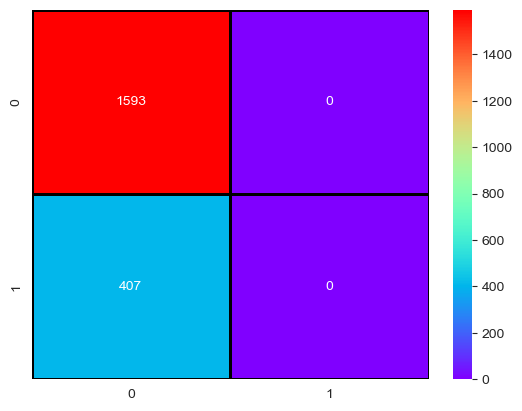

In [53]:
# Calculate accuracy
accuracy_svm = accuracy_score(y_test, svm_predictions)
formatted_accuracy_svm = "{:.2%}".format(accuracy_svm)

print('Accuracy  is:', formatted_accuracy_svm)

# Calculate confusion matrix
cm_SVM = confusion_matrix(y_test, svm_predictions)
sns.heatmap(cm_SVM, annot=True,cmap='rainbow',linewidth=1,linecolor='black',fmt='.0f')
print('Confusion Matrix:')
print(cm_SVM)

In [54]:
# Calculate precision, recall, and F1 score
report_svm = classification_report(y_test, svm_predictions)
print('Classification Report:')
print(report_svm)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Method 2

In [55]:
# Create classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC()
lr_classifier = LogisticRegression()
xgb_classifier = xgb.XGBClassifier()

# Train the classifiers
rf_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)
lr_predictions = lr_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)

# Calculate metrics for each classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

rf_precision = precision_score(y_test, rf_predictions)
svm_precision = precision_score(y_test, svm_predictions)
lr_precision = precision_score(y_test, lr_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)

rf_recall = recall_score(y_test, rf_predictions)
svm_recall = recall_score(y_test, svm_predictions)
lr_recall = recall_score(y_test, lr_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)

rf_f1_score = f1_score(y_test, rf_predictions)
svm_f1_score = f1_score(y_test, svm_predictions)
lr_f1_score = f1_score(y_test, lr_predictions)
xgb_f1_score = f1_score(y_test, xgb_predictions)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:

# Create a DataFrame to display the results
data = {
    'Classifier': ['Random Forest', 'SVM', 'Logistic Regression', 'Xgboost'],
    'Accuracy': [rf_accuracy, svm_accuracy, lr_accuracy, xgb_accuracy],
    'Precision': [rf_precision, svm_precision, lr_precision,xgb_precision],
    'Recall': [rf_recall, svm_recall, lr_recall, xgb_recall],
    'F1 Score': [rf_f1_score, svm_f1_score, lr_f1_score, xgb_f1_score]
}

df = pd.DataFrame(data)

# Set the Classifier column as the index
df.set_index('Classifier', inplace=True)

# Display the results
print(df)

                     Accuracy  Precision    Recall  F1 Score
Classifier                                                  
Random Forest          0.8655   0.787500  0.464373  0.584235
SVM                    0.7965   0.000000  0.000000  0.000000
Logistic Regression    0.7935   0.440000  0.054054  0.096280
Xgboost                0.8525   0.698582  0.484029  0.571843


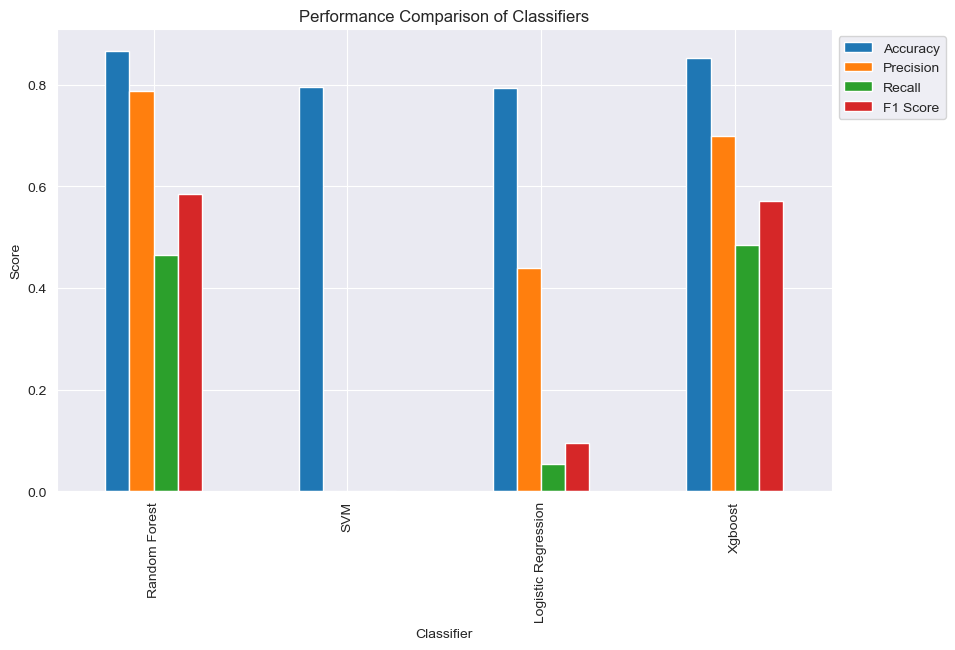

In [57]:
# Plot the bar chart
df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Performance Comparison of Classifiers')
#plt.legend(loc='upper right')  
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

In [58]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [59]:
feature_importance = rf_model.feature_importances_

feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values('Importance', ascending=False)

In [60]:
top_n = 10  # Specify the number of top features to display
top_features = feature_df.head(top_n)
print(top_features)

          Feature  Importance
3             Age    0.233077
10         Salary    0.144149
5         Balance    0.142478
0     CreditScore    0.139600
7   NumOfProducts    0.127569
4          Tenure    0.080061
1       Geography    0.044370
9        IsMember    0.043596
8       HasCrCard    0.019652
2          Gender    0.018191


In [89]:
#churn_rate = dataset.groupby(['Age', 'Salary'])['Exited'].mean()
churn_rate = dataset.groupby(['Age'])['Exited'].mean()

In [90]:
churn_rate = churn_rate.sort_values(ascending=False)

In [91]:
top_categories = churn_rate.head(10)

In [92]:
print(top_categories)

Age
56    0.714286
52    0.627451
54    0.607143
55    0.585366
51    0.554622
53    0.540541
50    0.529851
60    0.516129
49    0.510204
57    0.506667
Name: Exited, dtype: float64


In [95]:
churn_rate2 = dataset.groupby(['Salary'])['Exited'].mean()
churn_rate2 = churn_rate2.sort_values(ascending=False)
churn_rate2.head(10)

Salary
11.58       1.0
92982.61    1.0
91098.76    1.0
91167.19    1.0
91556.57    1.0
91560.63    1.0
91624.11    1.0
91817.38    1.0
91829.17    1.0
91844.14    1.0
Name: Exited, dtype: float64